In [3]:
!pip install tensorflow

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print("Training data shape:", train_images.shape)
print("Test data shape:", test_images.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


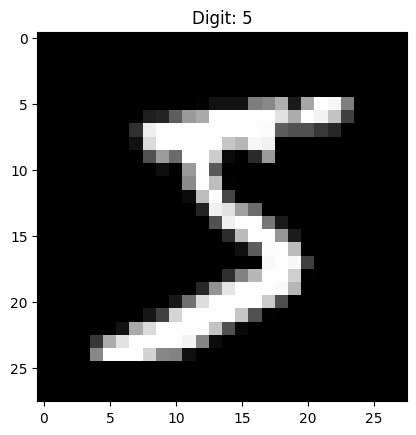

In [5]:
image = train_images[0]
label = train_labels[0]
plt.imshow(image, cmap='gray')
plt.title(f"Digit: {label}")
plt.show()

In [6]:
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

# Convert to float and normalize pixel values (0–1)
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255

In [7]:
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.fit(train_images, train_labels, epochs=5, batch_size=128, verbose=1)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8701 - loss: 0.4617
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9660 - loss: 0.1150
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9787 - loss: 0.0713
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9851 - loss: 0.0506
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9904 - loss: 0.0352


In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\n✅ Test Accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9795 - loss: 0.0689

✅ Test Accuracy: 98.17%


In [11]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Image 0: Predicted = 7, Actual = 7


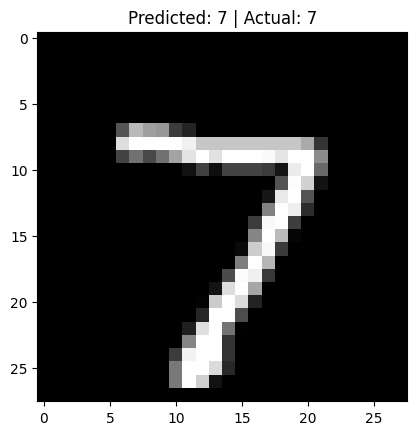

Image 1: Predicted = 2, Actual = 2


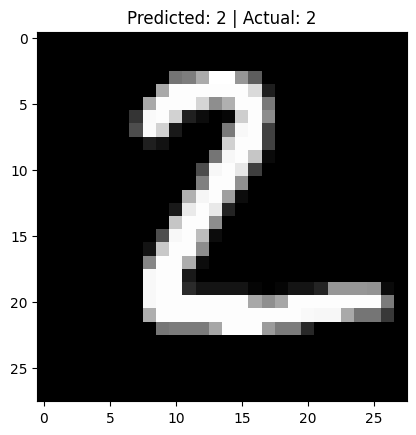

Image 2: Predicted = 1, Actual = 1


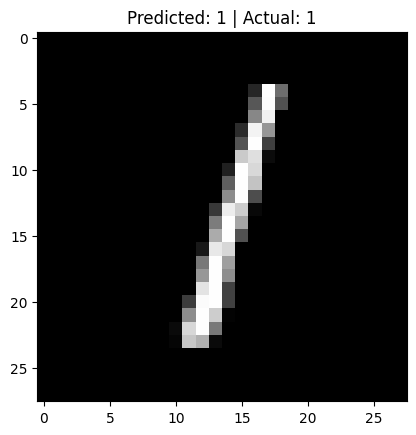

In [12]:
for i in range(3):
    predicted_label = np.argmax(predictions[i])
    actual_label = test_labels[i]
    print(f"Image {i}: Predicted = {predicted_label}, Actual = {actual_label}")

    plt.imshow(test_digits[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_label} | Actual: {actual_label}")
    plt.show()